![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## 1. Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## 2. Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## 3. Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [69]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics 

%matplotlib inline

In [70]:
# Converting some of the csv files into panda dataframes

imdb_title = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
imdb_title_akas = pd.read_csv('./data/zippedData/imdb.title.akas.csv.gz')
imdb_ratings = pd.read_csv('./data/zippedData/imdb.title.ratings.csv.gz')
imdb_names = pd.read_csv('./data/zippedData/imdb.name.basics.csv.gz') 
imdb_principals = pd.read_csv('./data/zippedData/imdb.title.principals.csv.gz') 
imdb_crew = pd.read_csv('./data/zippedData/imdb.title.crew.csv.gz') 
bom_gross = pd.read_csv('./data/zippedData/bom.movie_gross.csv.gz')


### 3.1 Exploring databases using .info()

#### 3.1.1. Database imdb.title.basics
Below, we notice that only the columns runtime_minutes and genres have null values

In [71]:
imdb_title.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### 3.1.2. Database imdb.title.akas
Below, we notice that few columns have null values


In [72]:
imdb_title_akas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


#### 3.1.3. Database imdb.ratings
Below we notice that all columns have values

In [73]:
imdb_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### 3.1.4. Database bom_gross
Unlike imdb datasets, this one gives us information about domestic and foreign gross. All columns except title have null values

In [74]:
bom_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### 3.2 Exploring databases using .head() and .value_counts()

#### 3.2.1. Database imdb.title.basics

In [75]:
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [76]:
imdb_title['tconst'].value_counts()

tt9188000    1
tt5167966    1
tt4522176    1
tt9151326    1
tt4729856    1
            ..
tt7617140    1
tt8059118    1
tt2870706    1
tt7314118    1
tt9120490    1
Name: tconst, Length: 146144, dtype: int64

**Observation:** each tconst have a unique value. IMDB website defines tconst as "alphanumer unique identifier of the title". As such, we will use tconst to merge title_basics and ratings

In [77]:
imdb_title['primary_title'].value_counts()


Home                        24
The Return                  20
Broken                      20
Homecoming                  16
Alone                       16
                            ..
State of Bacon               1
XX                           1
You Can Just Learn It        1
Marilyn! The New Musical     1
Ghosts of Darkness           1
Name: primary_title, Length: 136071, dtype: int64

**Observation:** IMDB website defines Primary title as follows: the more popular title / the title used by the filmmakers on promotional materials at the point of release

In [78]:
imdb_title['original_title'].value_counts()


Broken                        19
Home                          18
The Return                    17
Alone                         13
Freedom                       13
                              ..
White Wash                     1
Sex & Drugs & Rock & Roll      1
Conversation with a Cactus     1
Yajuu onna keiji Mia           1
Ghosts of Darkness             1
Name: original_title, Length: 137773, dtype: int64

In [79]:
imdb_title['start_year'].value_counts()


2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

**Note:** How is it possible that the start year are beyon actual year? eg 2115

In [80]:
imdb_title['runtime_minutes'].value_counts()


90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [81]:
imdb_title['genres'].value_counts()


Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
Comedy,Documentary,Western          1
Adventure,History,Sci-Fi            1
Action,Documentary,Thriller         1
Documentary,Music,Reality-TV        1
Comedy,History,Sport                1
Name: genres, Length: 1085, dtype: int64

#### 3.2.1. Database imdb.ratings

In [82]:
imdb_ratings.head()


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [83]:
imdb_ratings['tconst'].value_counts()

tt9188000    1
tt2325645    1
tt3492076    1
tt2536780    1
tt7921182    1
            ..
tt1763217    1
tt1305618    1
tt3766040    1
tt7921248    1
tt4111826    1
Name: tconst, Length: 73856, dtype: int64

In [84]:
imdb_ratings['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

In [85]:
imdb_ratings['numvotes'].value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [86]:
# Here you run your code to clean the data

**Comments:** I decide not to delete or create any column or raw at the moment. I want to keep all the information availalbe at the moment and clean it down the track, once the strategy is more defined. 

In [87]:
# Merge imdb_title and imdb_ratins on tconst, which is an alphanumer unique identifier of the movie title.
#I merge using left join because imdb_title has more raws than ratings, and I want to maintain all the information at the moment.

imdb_title_rating  = pd.merge(imdb_title, 
                              imdb_ratings, 
                              on=['tconst'], 
                              how='left') 


In [88]:
#I confirm that the merging has been sucesfful

imdb_title_rating.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [89]:
imdb_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


## INSIGHTS #1:  Top 25 Highest-Rated Movies 
In this section, we will get insights from the Top 25 Highest-rated movies, based on IMDB scores

In [90]:
#DATA CLEANING: To achieve our Strategy 1, we need to know the average rating of each movie, so we can select 
#the top 25 for furhter studies. Herein, we delete all the columns that have no averagerating:

imdb_title_rating.dropna(subset = ['averagerating'], inplace=True)

In [91]:
#We start exploring the movies with the highest average rating by sorting by "average rating" and applying .tail().

imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
71954,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6.0
1857,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0
93040,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5.0


From the above table, we notince that those movies with a high averareating value have very low number of votes. In the IMDB website, they mentioned that minimum votes required to be listed in the Top Rated 250 list is currently 25,000 (More info in this link: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#). 
We will follow the same strategy and delete all the movies with less than 25,000 votes.

In [92]:
#we want to delete the columns with less than 25000 votes
imdb_title_rating.drop(imdb_title_rating[imdb_title_rating['numvotes'] < 25000].index, inplace=True)





In [93]:
imdb_title_rating.sort_values('averagerating').tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
107713,tt6316138,Ayla: The Daughter of War,Ayla: The Daughter of War,2017,125.0,"Drama,History,War",8.7,26743.0
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135.0
43533,tt2592910,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",9.2,41560.0
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568.0


We will focus our studies in recent movies -> movies with less than 5 years. This data include movies from up to 2019, and as such, we will narrow our 5 years range between 2015 - 2019 (both inclusive)

In [94]:
#we create a list with the 25 movies between 2015 - 2019 that have the highest average rating

imdb_top25 = imdb_title_rating[imdb_title_rating['start_year'] >= 2015].sort_values('averagerating').tail(25)

In [95]:
imdb_top25

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70269,tt4016934,The Handmaiden,Ah-ga-ssi,2016,145.0,"Drama,Romance,Thriller",8.1,79272.0
76697,tt4387040,Airlift,Airlift,2016,130.0,"Drama,History",8.1,48323.0
29109,tt2119532,Hacksaw Ridge,Hacksaw Ridge,2016,139.0,"Biography,Drama,History",8.1,366904.0
21849,tt1895587,Spotlight,Spotlight,2015,129.0,"Crime,Drama",8.1,365110.0
56763,tt3315342,Logan,Logan,2017,137.0,"Action,Drama,Sci-Fi",8.1,560270.0
7213,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910.0
127087,tt7775622,Free Solo,Free Solo,2018,100.0,"Documentary,Sport",8.2,32250.0
85228,tt4934950,Talvar,Talvar,2015,132.0,"Crime,Drama,Mystery",8.2,25443.0
53866,tt3170832,Room,Room,2015,118.0,"Drama,Thriller",8.2,316791.0
86657,tt5027774,"Three Billboards Outside Ebbing, Missouri","Three Billboards Outside Ebbing, Missouri",2017,115.0,"Crime,Drama",8.2,344047.0


Which insights can we get from this lis? For example, what are the most common genres? What is the average duration of the top 25 movies? 

Let's start with the **average duration of the top 25 IMDB movies**


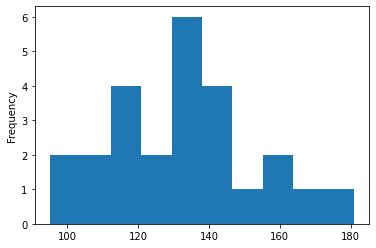

In [96]:
#we create a histogram of the duration, and observe that it doesn't follow a pure normal distribution, 
#so we will work with the median.

imdb_top25['runtime_minutes'].plot.hist();

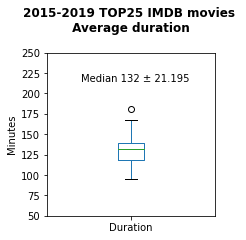

In [97]:
#We create a box plot with the duration ofthe movie
imdb_top25 = imdb_top25.rename(columns={'runtime_minutes': 'Duration'})


fig, ax = plt.subplots(figsize=(3, 3))
imdb_top25['Duration'].plot.box()
ax.set_title('2015-2019 TOP25 IMDB movies \n Average duration \n', fontweight="bold")
ax.set_ylabel('Minutes')
plt.text(0.7, 215, 'Median 132 ± 21.195', fontsize = 10)  #this values come from the following action
ax.set_ylim([50, 250]);

In [98]:
imdb_top25_duration_median = imdb_top25['Duration'].median()
imdb_top25_duration_stdev = statistics.stdev(imdb_top25['Duration'])

print(imdb_top25_duration_median)
print(imdb_top25_duration_stdev)

132.0
21.195754291838732


Now we move on to understant what are the **most common genres of the top 25 IMDB movies**


In [99]:
#first we extract all the genres into a pandas Series

genres = imdb_top25['genres'].map(lambda x: x.split(','))
type(genres)


pandas.core.series.Series

In [100]:
genres

70269         [Drama, Romance, Thriller]
76697                   [Drama, History]
29109        [Biography, Drama, History]
21849                     [Crime, Drama]
56763            [Action, Drama, Sci-Fi]
7213         [Action, Adventure, Sci-Fi]
127087              [Documentary, Sport]
85228            [Crime, Drama, Mystery]
53866                  [Drama, Thriller]
86657                     [Crime, Drama]
95481                  [Drama, Thriller]
28269     [Adventure, Animation, Comedy]
117014        [Biography, Comedy, Drama]
77309            [Crime, Drama, Mystery]
83932                    [Action, Drama]
38424     [Adventure, Animation, Comedy]
91844        [Animation, Drama, Fantasy]
87402         [Action, Biography, Drama]
80655     [Action, Adventure, Animation]
72820        [Action, Adventure, Sci-Fi]
130754                 [Crime, Thriller]
132555              [Action, Drama, War]
107713             [Drama, History, War]
72821        [Action, Adventure, Sci-Fi]
99483           

In [101]:
#now we want to create a unique list with all the genres listed, and remove the "," so we have only a list of words
col_one_list = imdb_top25['genres'].tolist()

sent_str = ""
for x in col_one_list:
    sent_str += str(x) + ","

sent_str = sent_str.split(',')
sent_str

['Drama',
 'Romance',
 'Thriller',
 'Drama',
 'History',
 'Biography',
 'Drama',
 'History',
 'Crime',
 'Drama',
 'Action',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Documentary',
 'Sport',
 'Crime',
 'Drama',
 'Mystery',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Drama',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Biography',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Animation',
 'Drama',
 'Fantasy',
 'Action',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Drama',
 'History',
 'War',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Drama',
 'War',
 '']

In [102]:
#now we want to count how many times each genre appears

from collections import Counter

counts_average = Counter(sent_str).most_common()
print(counts_average)
type(counts_average)

[('Drama', 17), ('Action', 9), ('Adventure', 6), ('Crime', 5), ('Thriller', 4), ('Sci-Fi', 4), ('Animation', 4), ('History', 3), ('Biography', 3), ('Comedy', 3), ('War', 3), ('Mystery', 2), ('Romance', 1), ('Documentary', 1), ('Sport', 1), ('Fantasy', 1), ('', 1)]


list

In [103]:
#As we want to ilustrate this data, we will create one list for the names of the genres, and one list with the values

names = []
for x in counts_average:
    names.append(x[0])


values = []
for x in counts_average:
    values.append(x[1])

print(names)
print(values)

['Drama', 'Action', 'Adventure', 'Crime', 'Thriller', 'Sci-Fi', 'Animation', 'History', 'Biography', 'Comedy', 'War', 'Mystery', 'Romance', 'Documentary', 'Sport', 'Fantasy', '']
[17, 9, 6, 5, 4, 4, 4, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1]


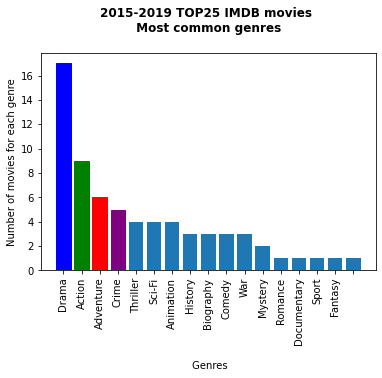

In [133]:
#now we can plot both lists, names and values

fig, ax = plt.subplots()
barlist=plt.bar(range(len(counts_average)), values, tick_label=names)
plt.xticks(rotation=90)
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('\n Genres')
ax.set_title('2015-2019 TOP25 IMDB movies \n Most common genres \n', fontweight="bold")
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
plt.show()



The graph above provides "static" information, it shows only the average of genre preferences during 2015-2019. But how did the preference for this genres changed across the past 5 years? Let's investigate it! 

In [105]:
# Before I had a list of list, with each item indicating the genre and the corresponding frequency (list named counts).
# Now I want to create a dictionary from this list, so I use this function

def Convert(lst):
    res_dct = {lst[i][0]: lst[i][1] for i in range(0, len(lst), 2)}
    return res_dct
         

In [106]:
#I test the function with the list of the top25 
counts_dict=(Convert(counts_average))
counts_dict

{'Drama': 17,
 'Adventure': 6,
 'Thriller': 4,
 'Animation': 4,
 'Biography': 3,
 'War': 3,
 'Romance': 1,
 'Sport': 1,
 '': 1}

In [107]:
type(counts_dict)

dict

In [108]:
#Now let's check the value of Drama

print(counts_dict.get('Drama'))

17


Now we have undesrtand how to get the value of each genre. Let's repeat these operations for each year, between 2015 and 2019

In [109]:
imdb_top25_2017 = imdb_title_rating[imdb_title_rating['start_year'] == 2017].sort_values('averagerating').tail(25)
imdb_top25_2018 = imdb_title_rating[imdb_title_rating['start_year'] == 2018].sort_values('averagerating').tail(25)
imdb_top25_2019 = imdb_title_rating[imdb_title_rating['start_year'] == 2019].sort_values('averagerating').tail(25)
imdb_top25_2016 = imdb_title_rating[imdb_title_rating['start_year'] == 2016].sort_values('averagerating').tail(25)
imdb_top25_2015 = imdb_title_rating[imdb_title_rating['start_year'] == 2015].sort_values('averagerating').tail(25)

In [110]:
genres_2017 = imdb_top25_2017['genres'].map(lambda x: x.split(','))
genres_2018 = imdb_top25_2018['genres'].map(lambda x: x.split(','))
genres_2019 = imdb_top25_2019['genres'].map(lambda x: x.split(','))
genres_2016 = imdb_top25_2016['genres'].map(lambda x: x.split(','))
genres_2015 = imdb_top25_2015['genres'].map(lambda x: x.split(','))

In [111]:
col_one_list_2017 = imdb_top25_2017['genres'].tolist()
col_one_list_2018 = imdb_top25_2018['genres'].tolist()
col_one_list_2019 = imdb_top25_2019['genres'].tolist()
col_one_list_2016 = imdb_top25_2016['genres'].tolist()
col_one_list_2015 = imdb_top25_2015['genres'].tolist()



In [112]:
sent_str_2015 = ""
for x in col_one_list_2015:
    sent_str_2015 += str(x) + ","

sent_str_2015 = sent_str_2015.split(',')

In [113]:
sent_str_2016 = ""
for x in col_one_list_2016:
    sent_str_2016 += str(x) + ","

sent_str_2016 = sent_str_2016.split(',')

In [114]:
sent_str_2017 = ""
for x in col_one_list_2017:
    sent_str_2017 += str(x) + ","

sent_str_2017 = sent_str_2017.split(',')

In [115]:
sent_str_2018 = ""
for x in col_one_list_2018:
    sent_str_2018 += str(x) + ","

sent_str_2018 = sent_str_2018.split(',')

In [116]:
sent_str_2019 = ""
for x in col_one_list_2019:
    sent_str_2019 += str(x) + ","

sent_str_2019 = sent_str_2019.split(',')

In [117]:
#let's check that it has worked for 2015

counts_2015 = Counter(sent_str_2015).most_common()
print(counts_2015)


[('Drama', 18), ('Adventure', 6), ('Action', 6), ('Crime', 5), ('Comedy', 5), ('Biography', 4), ('History', 3), ('Thriller', 3), ('Romance', 3), ('Mystery', 3), ('Animation', 2), ('War', 2), ('Documentary', 2), ('Sci-Fi', 2), ('Music', 1), ('Fantasy', 1), ('', 1)]


In [118]:
#let's check that it has worked for 2016

counts_2016 = Counter(sent_str_2016).most_common()
print(counts_2016)


[('Drama', 19), ('Comedy', 7), ('Action', 6), ('Adventure', 6), ('Biography', 5), ('Thriller', 4), ('Sci-Fi', 3), ('Animation', 3), ('History', 3), ('Mystery', 2), ('Music', 2), ('Sport', 1), ('Romance', 1), ('Crime', 1), ('Fantasy', 1), ('War', 1), ('', 1)]


In [119]:
#let's check that it has worked for 2017


counts_2017 = Counter(sent_str_2017).most_common()
print(counts_2017)


[('Drama', 17), ('Action', 9), ('Crime', 6), ('Adventure', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 3), ('Mystery', 3), ('Romance', 2), ('Animation', 2), ('Family', 2), ('History', 2), ('Sci-Fi', 2), ('Musical', 1), ('Horror', 1), ('Documentary', 1), ('Sport', 1), ('War', 1), ('', 1)]


In [120]:
#let's check that it has worked for 2018 

counts_2018 = Counter(sent_str_2018).most_common()
print(counts_2018)


[('Drama', 14), ('Action', 7), ('Adventure', 7), ('Comedy', 6), ('Sci-Fi', 5), ('Biography', 5), ('Thriller', 5), ('Crime', 4), ('Music', 3), ('Animation', 3), ('History', 2), ('Romance', 2), ('Horror', 1), ('Mystery', 1), ('Documentary', 1), ('Sport', 1), ('', 1)]


In [121]:
#let's check that it has worked for 2019

counts_2019 = Counter(sent_str_2019).most_common()
print(counts_2019)


[('Action', 14), ('Adventure', 12), ('Drama', 9), ('Crime', 6), ('Sci-Fi', 5), ('Comedy', 5), ('Biography', 4), ('Thriller', 4), ('Horror', 3), ('Mystery', 2), ('Family', 2), ('Fantasy', 2), ('Animation', 2), ('Documentary', 1), ('Music', 1), ('War', 1), ('', 1)]


In [122]:
counts_dict_2015=dict(counts_2015)
counts_dict_2016=dict(counts_2016)
counts_dict_2017=dict(counts_2017)
counts_dict_2018=dict(counts_2018)
counts_dict_2019=dict(counts_2019)


In [123]:
#Let's check the values of drama for each year

print(counts_dict_2015.get('Drama'))
print(counts_dict_2016.get('Drama'))
print(counts_dict_2017.get('Drama'))
print(counts_dict_2018.get('Drama'))
print(counts_dict_2019.get('Drama'))

18
19
17
14
9


In [124]:
#We create a list with the drama values for each year:

drama_list = [counts_dict_2015.get('Drama'), counts_dict_2016.get('Drama'), counts_dict_2017.get('Drama'), counts_dict_2018.get('Drama'), counts_dict_2019.get('Drama')]

In [125]:
#we check that the drama_list contains the correct information

drama_list

[18, 19, 17, 14, 9]

In [126]:
##Let's repeat for Action

action_list = [counts_dict_2015.get('Action'), counts_dict_2016.get('Action'), counts_dict_2017.get('Action'), counts_dict_2018.get('Action'), counts_dict_2019.get('Action')]


In [127]:
##Let's repeat for Adventure

adventure_list = [counts_dict_2015.get('Adventure'), counts_dict_2016.get('Adventure'), counts_dict_2017.get('Adventure'), counts_dict_2018.get('Adventure'), counts_dict_2019.get('Adventure')]


In [128]:
##Let's repeat for Crime

crime_list = [counts_dict_2015.get('Crime'), counts_dict_2016.get('Crime'), counts_dict_2017.get('Crime'), counts_dict_2018.get('Crime'), counts_dict_2019.get('Crime')]


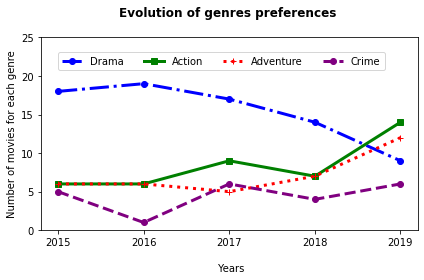

In [132]:
fig, ax = plt.subplots()
ax.plot(('2015','2016','2017','2018','2019'), drama_list , color="blue", lw=3, ls='-.', marker='o')
ax.plot(('2015','2016','2017','2018','2019'), action_list , color="green", lw=3, ls='-', marker='s')
ax.plot(('2015','2016','2017','2018','2019'), adventure_list , color="red", lw=3, ls=':', marker='+')
ax.plot(('2015','2016','2017','2018','2019'), crime_list , color="purple", lw=3, ls='--', marker='o')
ax.set_title('Evolution of genres preferences \n', fontweight="bold")
ax.set_ylabel('Number of movies for each genre')
ax.set_xlabel('\n Years')
ax.set_ylim([0, 25]);
fig.legend(ncol = 4, labels=["Drama", "Action", "Adventure", "Crime"], bbox_to_anchor=(0.91,0.82))
fig.tight_layout();

# Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## INSIGHTS #2:  Top 25 movies with the highest total gross
For these sections, we will use the following databases: bom_gross and tn.movie_budgets.

Let's refreshing what was in the bom_gross database:

In [134]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [135]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


First thing we can get from the information above, is that foreign_gross values are objects, and not float values such as domestic_gross.
To change gross values into float, first we delete the NaN values from that columns.

In [142]:
#we delete the rows that have no values in 'foreign_gross'

bom_gross.dropna(subset = ['foreign_gross'], inplace=True)

In [143]:
# Step to convert the value into float 

bom_gross["foreign_gross"] = [float(str(i).replace(",", "")) for i in bom_gross["foreign_gross"]]
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(float)


In [144]:
#let's check that now we have forign_gross as float64
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            2037 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.5+ KB


Let's start by calculating the **total gross**!

In [146]:
#calculate global gross

bom_gross['total_gross'] = bom_gross['foreign_gross'] + bom_gross['domestic_gross']

In [147]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [149]:
#let's calculate what are the top 25 movies with the highest total_gross

gross_top25 = bom_gross[bom_gross['year'] >= 2015].sort_values('total_gross').tail(25)
gross_top25.dropna(subset = ['total_gross'], inplace=True)
gross_top25


,title,studio,domestic_gross,foreign_gross,year,total_gross
2327,The Secret Life of Pets,Uni.,368400000.0,507100000.0,2016,8.755000e+08
2763,Spider-Man: Homecoming,Sony,334200000.0,546000000.0,2017,8.802000e+08
1877,Spectre,Sony,200100000.0,680600000.0,2015,8.807000e+08
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
2762,Jumanji: Welcome to the Jungle,Sony,404500000.0,557600000.0,2017,9.621000e+08
2326,The Jungle Book (2016),BV,364000000.0,602500000.0,2016,9.665000e+08
2325,Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09
2761,Despicable Me 3,Uni.,264600000.0,770200000.0,2017,1.034800e+09


In [150]:
#what are the studios of these top 25 movies? 

studios = dict(gross_top25['studio'].value_counts())
studios

{'BV': 11, 'Uni.': 4, 'Sony': 3, 'Fox': 1, 'WB': 1}

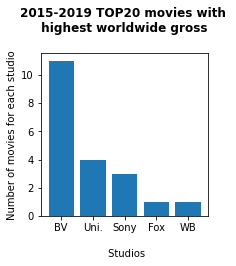

In [191]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.bar(*zip(*studios.items()))
ax.set_ylabel('Number of movies for each studio')
ax.set_xlabel('\n Studios')
ax.set_title('2015-2019 TOP20 movies with \n highest worldwide gross \n', fontweight="bold")
plt.show();





In [167]:
#let's calculate the total_Gross median and stdev/

gross_top25_SEM = statistics.stdev(gross_top25['total_gross'])
gross_top25_mean = statistics.median(gross_top25['total_gross'])


In [168]:
#let's make this values nicer, by presenting the value in millions (M) 

gross_top25_SEM_M=gross_top25_SEM/1000000
gross_top25_SEM_M

173.75255092657858

In [169]:
gross_top25_mean_M=gross_top25_mean/1000000
gross_top25_mean_M

1045.45

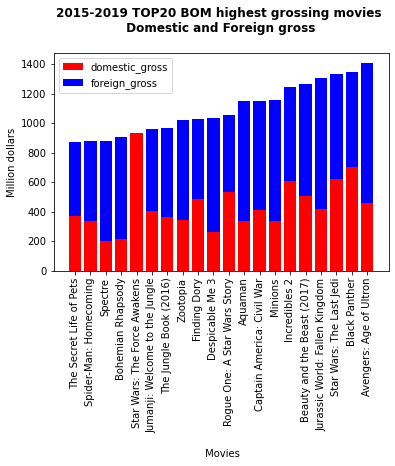

In [190]:

x = gross_top25['title']
y1 = gross_top25['domestic_gross']/1000000
y2 = gross_top25['foreign_gross']/1000000
  
# plot bars in stack manner
fig, ax = plt.subplots()
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
ax.set_ylabel('Million dollars')
ax.set_xlabel('\n Movies')
plt.legend(["domestic_gross", "foreign_gross"])


plt.xticks(rotation=90)
ax.set_title('2015-2019 TOP20 BOM highest grossing movies \n Domestic and Foreign gross \n', fontweight="bold")
plt.show()

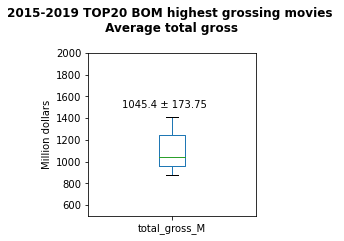

In [255]:
gross_top25['total_gross_M']=gross_top25['total_gross'] / 1000000


fig, ax = plt.subplots(figsize=(3, 3))
gross_top25['total_gross_M'].plot.box()
ax.set_title('2015-2019 TOP20 BOM highest grossing movies \n Average total gross \n', fontweight="bold")
ax.set_ylabel('Million dollars')
plt.text(0.7, 1500, '1045.4 ± 173.75', fontsize = 10)  #this values come from the following action
ax.set_ylim([500, 2000]);

Now we are going to explore other datasets that have gross values - tn database:  

In [194]:
#let's first open the csv file
tn_movie = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')


In [195]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [196]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [200]:
#we see that production_budget and gross values are objects, and we want to convert them into int. 
#so first we have to remove $ and ','

tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross'].str.replace('$', '')
tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross_new'].str.replace(',', '')


In [202]:
#let's check that now we have a value wihtout $ and/or ","

tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747


In [204]:
#let's convert the gross value into a float

tn_movie['worldwide_gross_new'] = tn_movie['worldwide_gross_new'].astype(float)

In [205]:
#and we repeat the previous steps with production_budget, to convert the values into floats

tn_movie['production_budget_new'] = tn_movie['production_budget'].str.replace('$', '')
tn_movie['production_budget_new'] = tn_movie['production_budget_new'].str.replace(',', '')
tn_movie['production_budget_new'] = tn_movie['production_budget_new'].astype(float)

In [206]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2.776345e+09,425000000.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1.045664e+09,410600000.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1.497624e+08,350000000.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1.403014e+09,330600000.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1.316722e+09,317000000.0


Consistently with the other data exploartion, we will focus with recent movies (i.e., from 2015). 
For this purpose, we have to convert the release date into data times

In [207]:
tn_movie['release_date']=pd.to_datetime(tn_movie['release_date'])

In [212]:
#now let's select the top 25 tn highest grossing movies

tn_movie_top25 = tn_movie[tn_movie['release_date'].dt.year >= 2015].sort_values('worldwide_gross_new').tail(20)
tn_movie_top25

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0
45,46,2016-06-17,Finding Dory,"$200,000,000","$486,295,561","$1,021,215,193",1.021215e+09,200000000.0
629,30,2017-06-30,Despicable Me 3,"$75,000,000","$264,624,300","$1,034,727,750",1.034728e+09,75000000.0
44,45,2016-12-16,Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",1.049103e+09,200000000.0
95,96,2019-03-08,Captain Marvel,"$175,000,000","$426,525,952","$1,123,061,550",1.123062e+09,175000000.0
16,17,2016-05-06,Captain America: Civil War,"$250,000,000","$408,084,349","$1,140,069,413",1.140069e+09,250000000.0
135,36,2018-12-21,Aquaman,"$160,000,000","$335,061,807","$1,146,894,640",1.146895e+09,160000000.0
672,73,2015-07-10,Minions,"$74,000,000","$336,045,770","$1,160,336,173",1.160336e+09,74000000.0
22,23,2017-04-14,The Fate of the Furious,"$250,000,000","$225,764,765","$1,234,846,267",1.234846e+09,250000000.0


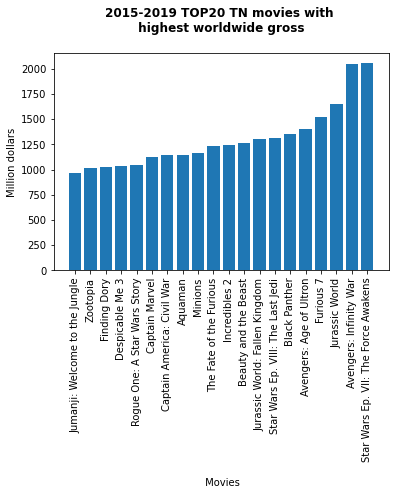

In [225]:
x = tn_movie_top25['movie']
y = tn_movie_top25['worldwide_gross_new']/1000000

fig, ax = plt.subplots()
plt.bar(x, y)
ax.set_ylabel('Million dollars')
ax.set_xlabel('\n Movies')
ax.set_title('2015-2019 TOP20 TN movies with \n highest worldwide gross \n', fontweight="bold")
plt.xticks(rotation=90)
plt.show();


In [231]:
tn_movie_top25_budget_M_mean = tn_movie_top25['production_budget_new'].mean() / 1000000
tn_movie_top25_budget_M_stdev = statistics.stdev(tn_movie_top25['production_budget_new']) / 1000000
tn_movie_top25_gross_M_mean = tn_movie_top25['worldwide_gross_new'].mean() / 1000000
tn_movie_top25_gross_M_stdev = statistics.stdev(tn_movie_top25['worldwide_gross_new'])/ 1000000

print(tn_movie_top25_budget_M_mean)
print(tn_movie_top25_budget_M_stdev)
print(tn_movie_top25_gross_M_mean)
print(tn_movie_top25_gross_M_stdev)


200.63
75.43711985906924
1301.9344939500002
309.6066114942965


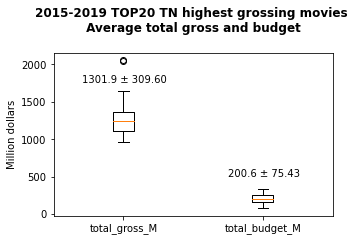

In [262]:
total_gross_M = tn_movie_top25['worldwide_gross_new']/1000000
total_budget_M = tn_movie_top25['production_budget_new']/1000000
fig, ax = plt.subplots(figsize=(5, 3))
plt.boxplot ([total_gross_M, total_budget_M])
ax.set_title('2015-2019 TOP20 TN highest grossing movies \n Average total gross and budget \n', fontweight="bold")
ax.set_ylabel('Million dollars')
plt.xticks([1, 2], ['total_gross_M', 'total_budget_M'])
plt.text(0.7, 1750, '1301.9 ± 309.60', fontsize = 10) #this values come from the following action;
plt.text(1.75, 500, '200.6 ± 75.43', fontsize = 10);  #this values come from the following action;

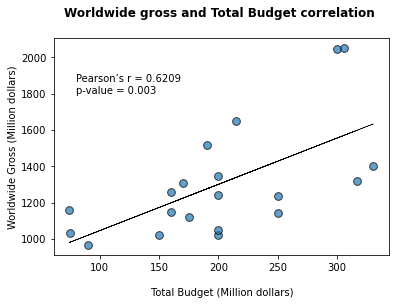

In [283]:
fig, ax = plt.subplots()

x = tn_movie_top25['production_budget_new'] / 1000000
y = tn_movie_top25['worldwide_gross_new']/ 1000000

# Graph X vs. Y as a scatter plot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,  color="black", lw=0.5)
ax.set_ylabel('Worldwide Gross (Million dollars)')
ax.set_xlabel('\n Total Budget (Million dollars)')
ax.set_title('Worldwide gross and Total Budget correlation \n', fontweight="bold")
plt.text(80, 1800, 'Pearson’s r = 0.6209 \np-value = 0.003', fontsize = 10); #this values come from the following action;;



In [284]:
stats.pearsonr(tn_movie_top25['production_budget_new'], tn_movie_top25['worldwide_gross_new'])

#Pearson’s r (0,4063—same as we got in Excel, R, etc.)
#A p-value. This is the probability that the true value of r is zero (no correlation).



(0.6209169504424389, 0.0034820052718047665)

To provide more insights, we will investigate who are the directors of these top10 highest grossing movies. We will use the tn top 20 list.
To link the name of the movies to their corresponding directors, we have to merge several datasets. In particular, we have to merge the tn_movie_top25 with the imdb datasets that contains all the information aobut movies and directors. 

First, let's refresh what is contained in the tn_movie_top25 and in the imdb_title_rating datasets.

In [286]:
tn_movie_top25.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0


In [287]:
imdb_title_rating.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0


In [288]:
#To merge both datasets, first we have to change the name of the column that we want to merge, 
#so it has a consistent name.

tn_movie_top25 = tn_movie_top25.rename(columns={'movie': 'original_title'})
tn_movie_top25.head(2)

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new
437,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0
156,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0


In [289]:
#now we merge both datasets using the original_title column, with an inner joint
gross_director_1  = pd.merge(tn_movie_top25, 
                              imdb_title_rating, 
                              on=['original_title'], 
                              how='inner') 

In [290]:
#now we want to join the imdb dataset that contains the directors informaiton
gross_director_2  = pd.merge(gross_director_1, 
                              imdb_crew, 
                              on=['tconst'], 
                              how='inner') 

In [291]:
#if we have a look to our new datset, we can see that some movies have more than one director, 
#and that some directors appear multiple time

gross_director_2.head(2)

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,worldwide_gross_new,production_budget_new,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,38,2017-12-20,Jumanji: Welcome to the Jungle,"$90,000,000","$404,508,916","$964,496,193",9.644962e+08,90000000.0,tt2283362,Jumanji: Welcome to the Jungle,2017,119.0,"Action,Adventure,Comedy",7.0,242735.0,nm0440458,"nm0571344,nm1273099,nm0003298,nm0684374,nm0885..."
1,57,2016-03-04,Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09,150000000.0,tt2948356,Zootopia,2016,108.0,"Adventure,Animation,Comedy",8.0,383446.0,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888..."


In [292]:
gross_director_2['directors'].value_counts()


nm0751577,nm0751648              2
nm0336620                        1
nm0049633,nm3210494,nm1853544    1
nm1119880                        1
nm1158544,nm0397174,nm0601781    1
nm0923736                        1
nm0281396,nm1349818              1
nm0004056,nm0533691              1
nm1853544,nm0049633              1
nm0174374                        1
nm0440458                        1
nm1291105                        1
nm1490123                        1
nm0083348                        1
nm3363032                        1
Name: directors, dtype: int64

In [293]:
#we want to create a list with all the directors id

col_one_directors = gross_director_2['directors'].tolist()

sent_str = ""
for x in col_one_directors:
    sent_str += str(x) + ","

directors_str = sent_str.split(',')
directors_str

['nm0440458',
 'nm1158544',
 'nm0397174',
 'nm0601781',
 'nm0004056',
 'nm0533691',
 'nm0049633',
 'nm3210494',
 'nm1853544',
 'nm0281396',
 'nm1349818',
 'nm0751577',
 'nm0751648',
 'nm1490123',
 'nm1853544',
 'nm0049633',
 'nm0336620',
 'nm0083348',
 'nm0174374',
 'nm1291105',
 'nm3363032',
 'nm0923736',
 'nm1119880',
 'nm0751577',
 'nm0751648',
 '']

In [295]:
#we explore whether a director appears in more than one movie, by using the counter function

directors = Counter(directors_str).most_common()
print(directors)
type(directors)

[('nm0049633', 2), ('nm1853544', 2), ('nm0751577', 2), ('nm0751648', 2), ('nm0440458', 1), ('nm1158544', 1), ('nm0397174', 1), ('nm0601781', 1), ('nm0004056', 1), ('nm0533691', 1), ('nm3210494', 1), ('nm0281396', 1), ('nm1349818', 1), ('nm1490123', 1), ('nm0336620', 1), ('nm0083348', 1), ('nm0174374', 1), ('nm1291105', 1), ('nm3363032', 1), ('nm0923736', 1), ('nm1119880', 1), ('', 1)]


list

In [296]:
directors[0][0]

'nm0049633'

In [297]:
#let's refresh what is in the last table that we want to join to get the name of the directors
imdb_names.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [301]:
#now we want to create a new table that will containt the id of each director (which measn the nconst) and 
#the number of times that the director has appeared in the top25 tn highest grossing movies

const_directors = []
for x in directors:
    const_directors.append(x[0])


repetitions_directors = []
for x in directors:
    repetitions_directors.append(x[1])


In [302]:
#let's create the dataframe

d = {'directors':const_directors,'repetition':repetitions_directors}
df_directors = pd.DataFrame(d)

df_directors = df_directors.rename(columns={'directors': 'nconst'})
df_directors

,nconst,repetition
0,nm0049633,2
1,nm1853544,2
2,nm0751577,2
3,nm0751648,2
4,nm0440458,1
5,nm1158544,1
6,nm0397174,1
7,nm0601781,1
8,nm0004056,1
9,nm0533691,1


In [304]:
#and now we can merge our new database with the name of the directors

gross_director_3  = pd.merge(df_directors, 
                              imdb_names, 
                              on=['nconst'], 
                              how='inner') 
gross_director_3

,nconst,repetition,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0049633,2,Kyle Balda,1971.0,NaN,"director,animation_department,visual_effects","tt2293640,tt1482459,tt0116996,tt3469046"
1,nm1853544,2,Pierre Coffin,1967.0,NaN,"actor,director,producer","tt1690953,tt2293640,tt3469046,tt1323594"
2,nm0751577,2,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
3,nm0751648,2,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
4,nm0440458,1,Jake Kasdan,1974.0,NaN,"producer,director,actor","tt1956620,tt0120906,tt0473709,tt0841046"
5,nm1158544,1,Jared Bush,1974.0,NaN,"writer,miscellaneous,producer","tt3521164,tt2948356,tt0161081,tt0362404"
6,nm0397174,1,Byron Howard,1968.0,NaN,"animation_department,director,actor","tt0398286,tt0328880,tt2948356,tt0397892"
7,nm0601781,1,Rich Moore,1963.0,NaN,"miscellaneous,director,art_department","tt2948356,tt5848272,tt1772341,tt0149460"
8,nm0004056,1,Andrew Stanton,1965.0,NaN,"writer,actor,producer","tt0120623,tt0266543,tt2277860,tt0910970"
9,nm0533691,1,Angus MacLane,NaN,NaN,"animation_department,actor,writer","tt0910970,tt0317705,tt2446040,tt2277860"


In [306]:
#Let's make the table look nicer by deleting some columns

gross_director_4 = gross_director_3.drop(['nconst','birth_year', 'death_year','primary_profession', 'known_for_titles'], axis = 1)
gross_director_4 = gross_director_4.rename(columns={'primary_name': 'Director', 'repetition' : 'number of Top 25 movies'})
gross_director_4

,number of Top 25 movies,Director
0,2,Kyle Balda
1,2,Pierre Coffin
2,2,Anthony Russo
3,2,Joe Russo
4,1,Jake Kasdan
5,1,Jared Bush
6,1,Byron Howard
7,1,Rich Moore
8,1,Andrew Stanton
9,1,Angus MacLane


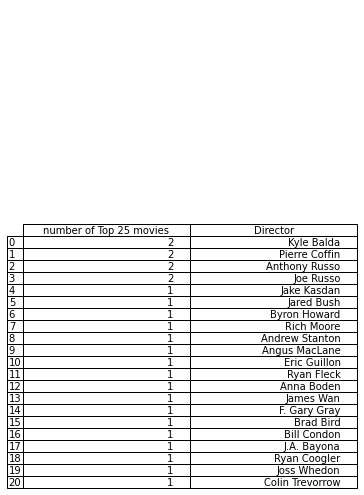

In [310]:
from pandas.plotting import table  # EDIT: see deprecation warnings below

ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, gross_director_4)  # where df is your data frame

plt.savefig('directors_table.png')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [ ]:
rt_reviews = pd.read_csv('./data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding="latin-1")
rt_movies = pd.read_csv('./data/zippedData/rt.movie_info.tsv.gz', sep='\t', encoding="latin-1")


In [ ]:
rt_movies = pd.read_csv('./data/zippedData/rt.csv')


In [ ]:
I was having problems reading this file, I tried latin-1, UT8-8, unviersal... phyton engine.... erros false and i READ SOMEONE THAt said open the file and save it as csv WITH utf-8

In [ ]:
rt_movies.info()

In [ ]:
rt_movies.head()

In [193]:
rt_reviews.info()

NameError: name 'rt_reviews' is not defined

In [ ]:
rt_reviews.head(15)

In [ ]:
tmdb = pd.read_csv('./data/zippedData/tmdb.movies.csv.gz')


In [ ]:
tmdb.info()

In [ ]:
tmdb.head()

In [ ]:
rt_reviews.head(15)

In [ ]:
rt_reviews['rating_new'] = rt_reviews['rating']

In [ ]:
rt_reviews.dropna(subset = ['rating_new'], inplace=True)

In [ ]:
rt_reviews.head()

In [ ]:
a = rt_reviews[rt_reviews['rating_new'].astype(str).str.isdigit()]


In [ ]:
rt_movies.head()

In [ ]:
imdb_principals.head()